In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# For 70-15-15 split

In [3]:
import os
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import tensorflow as tf

# Function to load images from a given folder
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (32, 32))  # Resize to 32x32
            images.append(img)
            labels.append(label)
    return images, labels

# Function to load dataset from folders
def load_dataset(base_path):
    # Load images from each folder
    x_train, y_train = [], []
    x_test, y_test = [], []
    x_val, y_val = [], []

    for sub_folder in ['train_70_15_15', 'test_70_15_15', 'val_70_15_15']:
        folder_path = os.path.join(base_path, sub_folder)
        for label, class_name in enumerate(['Glaucoma', 'Healthy']):
            class_folder = os.path.join(folder_path, class_name)
            images, labels = load_images_from_folder(class_folder, label)
            if sub_folder == 'train_70_15_15':
                x_train.extend(images)
                y_train.extend(labels)
            elif sub_folder == 'test_70_15_15':
                x_test.extend(images)
                y_test.extend(labels)
            elif sub_folder == 'val_70_15_15':
                x_val.extend(images)
                y_val.extend(labels)

    x_train = np.array(x_train, dtype='float32') / 255.0
    x_test = np.array(x_test, dtype='float32') / 255.0
    x_val = np.array(x_val, dtype='float32') / 255.0
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_val = np.array(y_val)

    x_train = x_train.reshape(-1, 32, 32)
    x_test = x_test.reshape(-1, 32, 32)
    x_val = x_val.reshape(-1, 32, 32)

    return x_train, x_test, x_val, y_train, y_test, y_val

# Load datasets
base_path = '/content/drive/MyDrive/hariDataset/70_15_15/70_15_15'  # Replace with your dataset path

# Load dataset
x_train, x_test, x_val, y_train, y_test, y_val = load_dataset(base_path)

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models
import cv2
from sklearn.model_selection import train_test_split

# Define a further simplified LeNet architecture
def build_lenet():
    model = models.Sequential()
    model.add(layers.Conv2D(3, (5, 5), activation='relu', input_shape=(32, 32, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(6, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(30, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification
    return model

# # Build and compile the model
lenet = build_lenet()
lenet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Function to train and evaluate model
def train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test):
    model = build_lenet()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))
    y_pred_proba = model.predict(x_test)
    y_pred = (y_pred_proba >= 0.5).astype(int)
    return model, y_test, y_pred, y_pred_proba

# Train and evaluate the RNN model
model, y_test, y_pred, y_pred_proba = train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test)

# Save the model
model.save('/content/drive/MyDrive/hariDataset/70_15_15/70_15_15/best_glaucoma_lenet_model.h5')

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7014 - loss: 0.6646 - val_accuracy: 0.6735 - val_loss: 0.6392
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6724 - loss: 0.6353 - val_accuracy: 0.6735 - val_loss: 0.6201
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6505 - loss: 0.6307 - val_accuracy: 0.6735 - val_loss: 0.5912
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6936 - loss: 0.5782 - val_accuracy: 0.7061 - val_loss: 0.5744
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7347 - loss: 0.5494 - val_accuracy: 0.7347 - val_loss: 0.5237
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7480 - loss: 0.5375 - val_accuracy: 0.7551 - val_loss: 0.5152
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7586 - loss: 0.5133 - val_accuracy: 0.7510 - val_loss: 0.5151
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7317 - loss: 0.5367 - val_accuracy: 0.

Accuracy: 0.8685
Precision: 0.8708
Recall: 0.9394
F1 Score: 0.9038
F2 Score: 0.9248
Average Precision (AP): 0.9109
AUC-ROC: 0.8936
Cohen's Kappa: 0.6972
Diagnostic Odds Ratio: 42.4565
Confusion Matrix:
[[ 63  23]
 [ 10 155]]


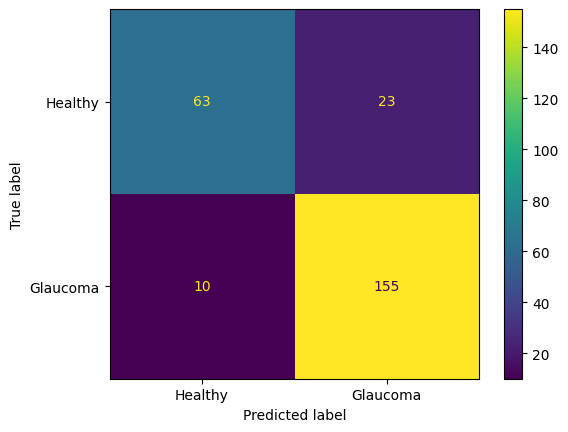

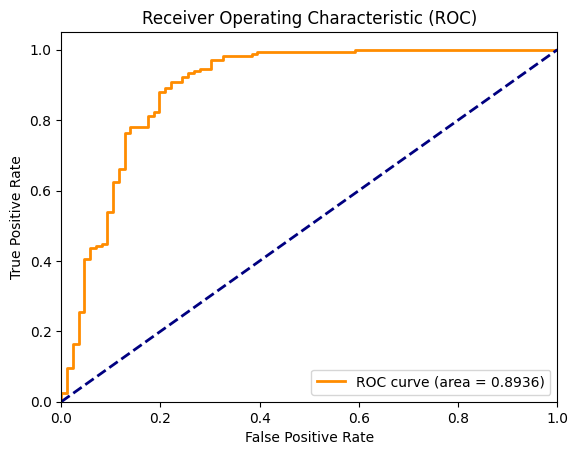

In [11]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    average_precision_score, roc_auc_score, confusion_matrix, roc_curve, auc,
    cohen_kappa_score, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
f2_score = fbeta_score(y_test, y_pred, beta=2)
diagnostic_odds_ratio = (conf_matrix[0, 0] * conf_matrix[1, 1]) / (conf_matrix[0, 1] * conf_matrix[1, 0])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2_score:.4f}")
print(f"Average Precision (AP): {average_precision:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"Cohen's Kappa: {cohen_kappa:.4f}")
print(f"Diagnostic Odds Ratio: {diagnostic_odds_ratio:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Healthy', 'Glaucoma']).plot()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Save the model
model.save('/content/drive/MyDrive/DatasetU/best_glaucoma_lenet_model.h5')

# For 80-10-10

In [12]:
def load_dataset(base_path):
    # Load images from each folder
    x_train, y_train = [], []
    x_test, y_test = [], []
    x_val, y_val = [], []

    for sub_folder in ['train_80_10_10', 'test_80_10_10', 'val_80_10_10']:
        folder_path = os.path.join(base_path, sub_folder)
        for label, class_name in enumerate(['Glaucoma', 'Healthy']):
            class_folder = os.path.join(folder_path, class_name)
            images, labels = load_images_from_folder(class_folder, label)
            if sub_folder == 'train_80_10_10':
                x_train.extend(images)
                y_train.extend(labels)
            elif sub_folder == 'test_80_10_10':
                x_test.extend(images)
                y_test.extend(labels)
            elif sub_folder == 'val_80_10_10':
                x_val.extend(images)
                y_val.extend(labels)

    x_train = np.array(x_train, dtype='float32') / 255.0
    x_test = np.array(x_test, dtype='float32') / 255.0
    x_val = np.array(x_val, dtype='float32') / 255.0
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_val = np.array(y_val)

    x_train = x_train.reshape(-1, 32, 32)
    x_test = x_test.reshape(-1, 32, 32)
    x_val = x_val.reshape(-1, 32, 32)

    return x_train, x_test, x_val, y_train, y_test, y_val

# Load datasets
base_path = '/content/drive/MyDrive/hariDataset/80_10_10/80_10_10'  # Replace with your dataset path

# Load dataset
x_train, x_test, x_val, y_train, y_test, y_val = load_dataset(base_path)

In [13]:
model, y_test, y_pred, y_pred_proba = train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test)

# Save the model
model.save('/content/drive/MyDrive/hariDataset/80_10_10/80_10_10/best_glaucoma_lenet_model.h5')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5916 - loss: 0.6841 - val_accuracy: 0.6707 - val_loss: 0.6072
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6932 - loss: 0.5756 - val_accuracy: 0.8232 - val_loss: 0.4958
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7772 - loss: 0.4922 - val_accuracy: 0.7988 - val_loss: 0.4685
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7687 - loss: 0.4837 - val_accuracy: 0.8293 - val_loss: 0.4382
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7851 - loss: 0.4542 - val_accuracy: 0.8293 - val_loss: 0.4279
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8044 - loss: 0.4459 - val_accuracy: 0.8598 - val_loss: 0.4204
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8094 - loss: 0.4377 - val_accuracy: 0.8537 - val_loss: 0.4083
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8165 - loss: 0.4180 - val_accuracy: 0.8537 - val_l

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Accuracy: 0.8780
Precision: 0.8947
Recall: 0.9273
F1 Score: 0.9107
F2 Score: 0.9206
Average Precision (AP): 0.8962
AUC-ROC: 0.8808
Cohen's Kappa: 0.7186
Diagnostic Odds Ratio: 44.6250
Confusion Matrix:
[[ 42  12]
 [  8 102]]


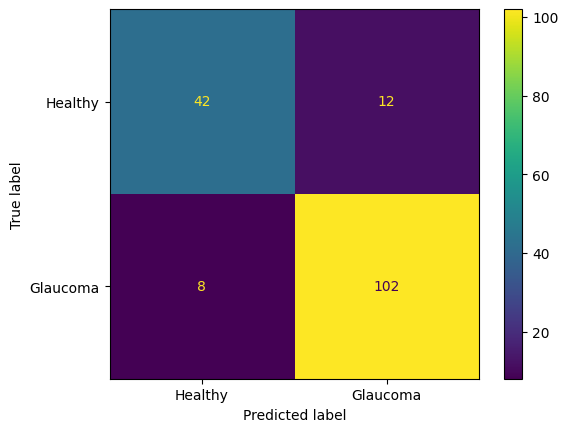

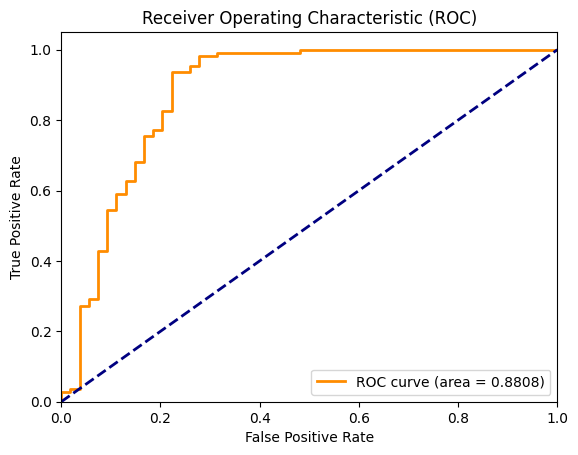

In [14]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
f2_score = fbeta_score(y_test, y_pred, beta=2)
diagnostic_odds_ratio = (conf_matrix[0, 0] * conf_matrix[1, 1]) / (conf_matrix[0, 1] * conf_matrix[1, 0])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2_score:.4f}")
print(f"Average Precision (AP): {average_precision:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"Cohen's Kappa: {cohen_kappa:.4f}")
print(f"Diagnostic Odds Ratio: {diagnostic_odds_ratio:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Healthy', 'Glaucoma']).plot()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Save the model
model.save('/content/drive/MyDrive/DatasetU/best_glaucoma_lenet_model.h5')